## 2章 章末問題

In [19]:
import pandas as pd
import mplfinance as mpf

---
#### (1) 4つの銘柄A0001, B0001, C0001, D0001の2013年1月1日から2013年12月31日までの日次データを使って、以下の問題を解いてみよう。

##### (a) 4本値と出来高を選択してみよう。
##### (b) 日次株価データ系列を日次リターンデータ系列に変換してみよう。
##### (c) 問題(1)(a)の選択の後、4銘柄のローソク足チャートを縦に並べて描画してみよう。

---

In [20]:
# CSV ファイルを読み込み DataFrame を構成し、stockDaily 変数にセット
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
# mplfinanceによるplotでは横軸はdatetime64型でなければならないので、Period型への変換はコメントアウトしている。
# stockDaily['date'] = stockDaily['date'].dt.to_period('D')
print(stockDaily)

         ticker       date  open  high   low  close  volume     share  \
0         A0001 1991-01-04  1411  1498  1411   1457    1127  19856748   
1         A0001 1991-01-07  1456  1456  1456   1456    1863  19856748   
2         A0001 1991-01-08  1424  1441  1424   1441    8084  19856748   
3         A0001 1991-01-09  1437  1437  1437   1437    7542  19856748   
4         A0001 1991-01-10  1401  1451  1384   1424     986  19856748   
...         ...        ...   ...   ...   ...    ...     ...       ...   
12005999  Z0137 2014-12-24   645   645   645    645  237742  65976380   
12006000  Z0137 2014-12-25   640   643   628    643   77924  65976380   
12006001  Z0137 2014-12-26   649   649   645    645  110739  65976380   
12006002  Z0137 2014-12-29   635   653   618    631  226144  65976380   
12006003  Z0137 2014-12-30   644   647   644    647  286380  65976380   

            return industry  qme qbeme  
0        -0.884354        A  ME1   BM5  
1        -0.068634        A  ME1   BM5  


In [21]:
# (a) 4本値と出来高を選択してみよう。

df = stockDaily.loc[stockDaily['ticker'].isin(['A0001', 'B0001', 'C0001', 'D0001']), ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume']]
df = df[(df['date']>='2013-01-01') & (df['date']<='2013-12-31')]
print(df)

        ticker       date  open  high   low  close  volume
5414     A0001 2013-01-04   939   939   939    939   64194
5415     A0001 2013-01-07   939   939   939    939  131700
5416     A0001 2013-01-08   988  1006   952    973  194667
5417     A0001 2013-01-09   948   958   927    958  144336
5418     A0001 2013-01-10   915   915   915    915  170245
...        ...        ...   ...   ...   ...    ...     ...
1029201  D0001 2013-12-24  3195  3227  3195   3227    4233
1029202  D0001 2013-12-25  3303  3312  3162   3197    3524
1029203  D0001 2013-12-26  3015  3168  2938   3168    2974
1029204  D0001 2013-12-27  3226  3226  3178   3178     576
1029205  D0001 2013-12-30  3114  3176  3100   3176    2983

[980 rows x 7 columns]


In [22]:
# (b) 日次株価データ系列を日次リターンデータ系列に変換してみよう。

# stockDailyは元々ticker,date順に並んでいるの次のsort_values()は必要ないが、pct_change()のような行間計算を行う時はsortingを意識されたい。
df = df.sort_values(['ticker','date'])
df['return'] = df.groupby('ticker')['close'].pct_change()
print(df)

        ticker       date  open  high   low  close  volume    return
5414     A0001 2013-01-04   939   939   939    939   64194       NaN
5415     A0001 2013-01-07   939   939   939    939  131700  0.000000
5416     A0001 2013-01-08   988  1006   952    973  194667  0.036209
5417     A0001 2013-01-09   948   958   927    958  144336 -0.015416
5418     A0001 2013-01-10   915   915   915    915  170245 -0.044885
...        ...        ...   ...   ...   ...    ...     ...       ...
1029201  D0001 2013-12-24  3195  3227  3195   3227    4233 -0.004012
1029202  D0001 2013-12-25  3303  3312  3162   3197    3524 -0.009297
1029203  D0001 2013-12-26  3015  3168  2938   3168    2974 -0.009071
1029204  D0001 2013-12-27  3226  3226  3178   3178     576  0.003157
1029205  D0001 2013-12-30  3114  3176  3100   3176    2983 -0.000629

[980 rows x 8 columns]


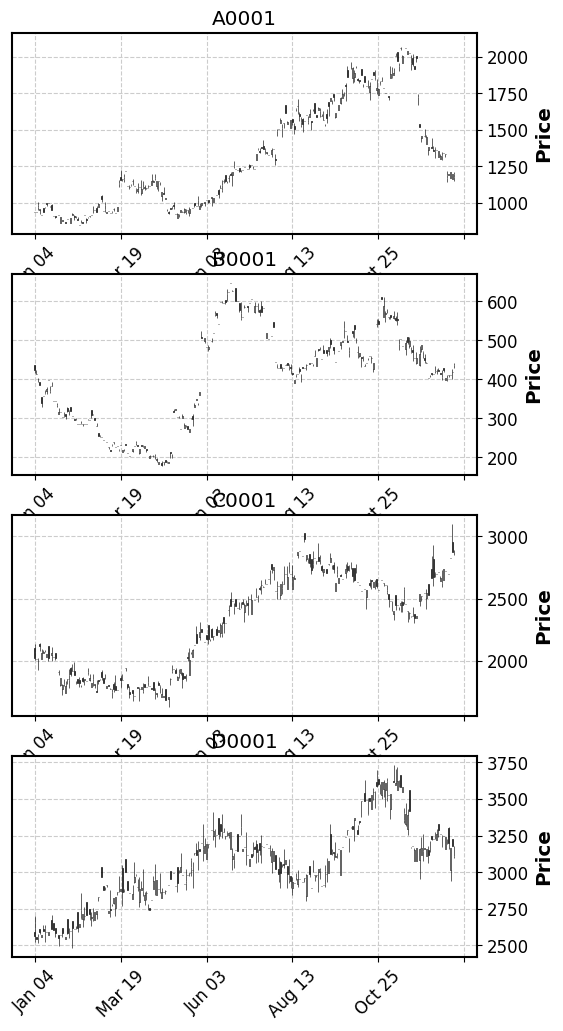

In [27]:
# (c) 問題(1)(a)の選択の後、4銘柄のローソク足チャートを縦に並べて描画してみよう。
# 解答例1: 教科書で紹介した一つのplotとして複数のチャートを描画する方法

candle1 = df.loc[df['ticker']=='A0001', ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')
candle2 = df.loc[df['ticker']=='B0001', ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')
candle3 = df.loc[df['ticker']=='C0001', ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')
candle4 = df.loc[df['ticker']=='D0001', ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')

fig = mpf.figure(figsize=(6, 3*4), style='classic')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
mpf.plot(candle1, type='candle', ax=ax1, axtitle='A0001')
mpf.plot(candle2, type='candle', ax=ax2, axtitle='B0001')
mpf.plot(candle3, type='candle', ax=ax3, axtitle='C0001')
mpf.plot(candle4, type='candle', ax=ax4, axtitle='D0001')


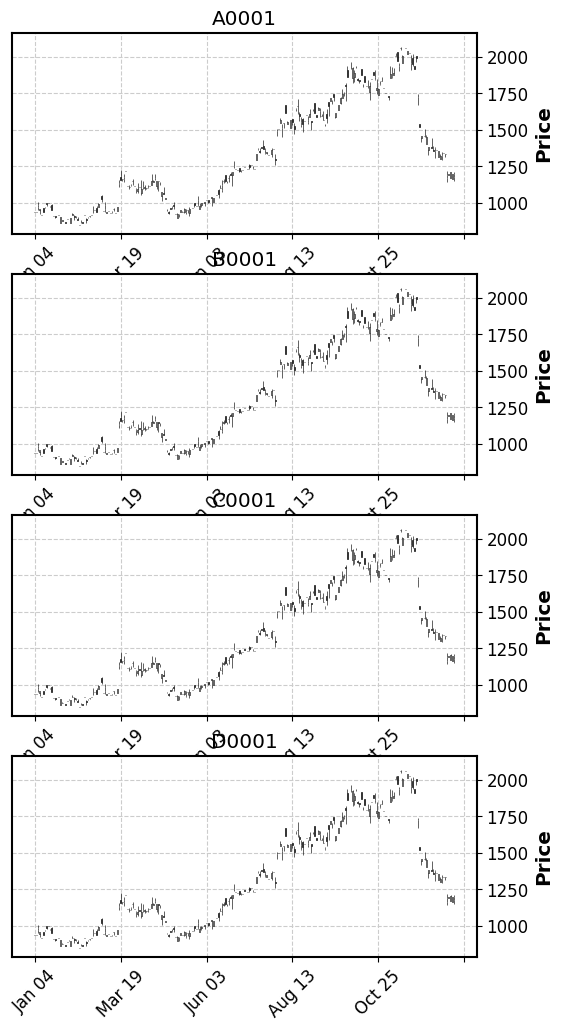

In [28]:
# (c) 問題(1)(a)の選択の後、4銘柄のローソク足チャートを縦に並べて描画してみよう。
# 解答例2: for文で回すことでより簡潔に記述できる。

fig = mpf.figure(figsize=(6, 3*4), style='classic')
for i, ticker in enumerate(['A0001', 'B0001', 'C0001', 'D0001']):
    candle = df.loc[df['ticker']==ticker, ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')
    ax = fig.add_subplot(4, 1, i+1)
    mpf.plot(candle1, type='candle', ax=ax, axtitle=ticker)


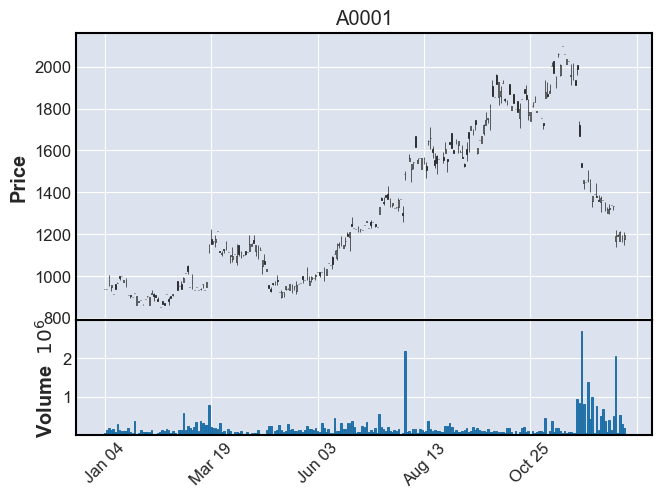

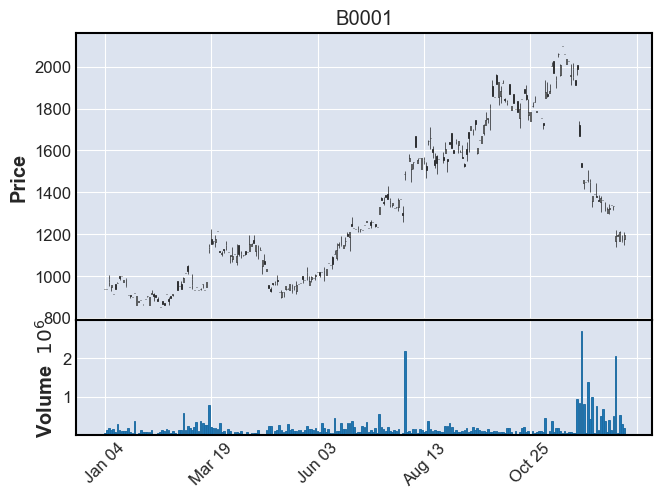

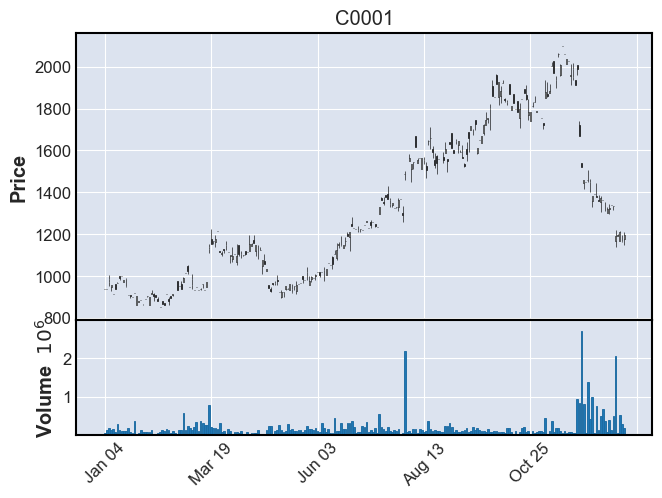

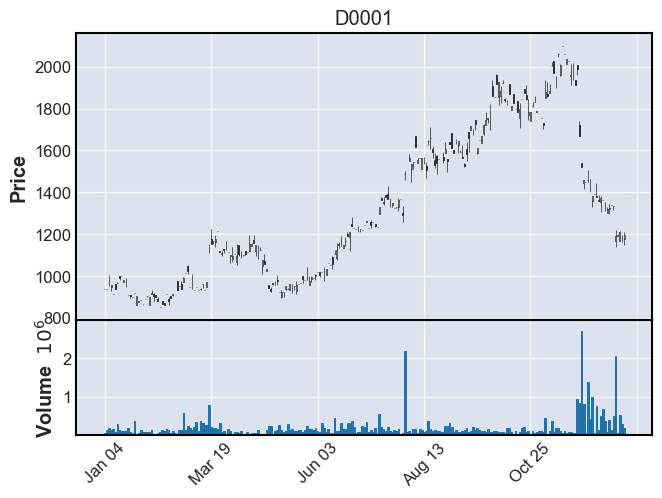

In [31]:
# (c) 問題(1)(a)の選択の後、4銘柄のローソク足チャートを縦に並べて描画してみよう。
# 解答例3: volumeを加えたチャートは同一のplot上には描画できないので、一つずつplotする。

for i, ticker in enumerate(['A0001', 'B0001', 'C0001', 'D0001']):
    candle = df.loc[df['ticker']==ticker, ['date', 'open', 'high', 'low', 'close', 'volume']].set_index('date')
    mpf.plot(candle1, type='candle', volume=True, axtitle=ticker)


---
#### (2) コード2.10をふまえて、次の問題を解いてみよう。

##### (a) ゴールデンクロスとデッドクロスがおこった日の一覧を作成してみよう。
##### (b) 短期の期間13日、中長期の期間を26日にして問題(2)(a)と同様の一覧を作成し、ゴールデンクロスとデッドクロスがおこる頻度を比較してみよう。

---

           ticker  open  high   low  close   volume     share     return  \
date                                                                       
2012-01-04  A0001  1683  1683  1683   1683    89264  18179794  -0.118694   
2012-01-05  A0001  1604  1666  1534   1666   100683  18179794  -1.010101   
2012-01-06  A0001  1630  1708  1630   1655    42017  18179794  -0.660264   
2012-01-10  A0001  1668  1668  1668   1668    37014  18179794   0.785498   
2012-01-11  A0001  1724  1724  1667   1667    61042  18179794  -0.059952   
...           ...   ...   ...   ...    ...      ...       ...        ...   
2013-12-24  A0001  1167  1218  1141   1191  2054917  14698572 -10.786520   
2013-12-25  A0001  1193  1199  1193   1195    74151  14698572   0.335852   
2013-12-26  A0001  1168  1213  1168   1208   526850  14698572   1.087866   
2013-12-27  A0001  1166  1196  1164   1196   305329  14698572  -0.993377   
2013-12-30  A0001  1179  1209  1147   1195   182782  14698572  -0.083612   

           

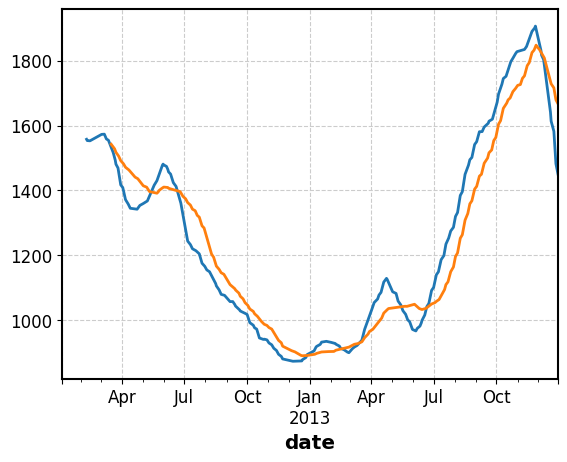

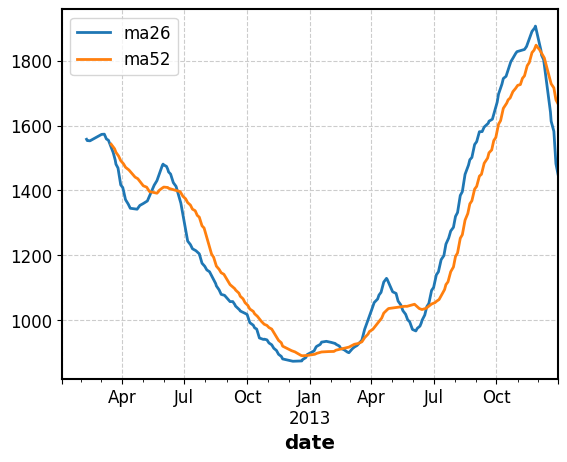

In [7]:
# コード2.8,9,10の再掲(一部、pngの保存は省略)

# コード2.8
# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()

# 銘柄A0001のデータを選択する。
df = stockDaily[stockDaily['ticker'] == 'A0001']

# 日付を行ラベルに設定: plotしたときに横軸目盛りになる
# 日付をラベルスライサで選択
df = df.loc['2012-01-01': '2013-12-31']
print(df)

# コード2.9
# 26日移動平均、52日移動平均
ma26 = df['close'].rolling(26).mean()
ma52 = df['close'].rolling(52).mean()

# Seriesのplot()メソッドを複数実行すれば重ねて描画されていく
ax = ma26.plot()
ax = ma52.plot(ax=ax)

# コード2.10
# close列からのみなるDataFrameを実体をコピーして作成
ma = df[['close']].copy()
# 移動平均の計算結果を同じDataFrameの列として追加する
ma['ma26'] = ma['close'].rolling(26).mean()
ma['ma52'] = ma['close'].rolling(52).mean()
# 短期(26日)移動平均が中長期(52日)移動平均を上回ったかどうか
ma['SgL'] = ma['ma26'] > ma['ma52']  # short term MA greater than long term MA
# ２つの移動平均の列を選択してチャートを描画
ma[['ma26', 'ma52']].plot()
# ゴールデンクロスとデッドクロスが起こる期間の内容を表示
print(ma.iloc[86:92])
print(ma.iloc[113:119])


In [8]:
# (a) ゴールデンクロスとデッドクロスがおこった日の一覧を作成してみよう。

# 短期が長期を上回ってる(SgL: Shorter greater than Longer)日に印をつけておく。
ma['SgL'] = ma['ma26'] > ma['ma52']
# shiftして一日前の印も作っておく。
ma['SgLyesterday'] = ma['SgL'].shift()
ma = ma.dropna(how='any')

# 当日に短期が長期を上回っていて、前日はそうでない日はgolden cross
ma['gold'] = (ma['SgL'] == True) & (ma['SgLyesterday'] == False)
# 逆に当日に長期が短期を上回っていて、前日はそうでない日はdead cross
ma['dead'] = (ma['SgL'] == False) & (ma['SgLyesterday'] == True)

# 表示
print('golden cross')
print(ma[ma['gold'] == True])
print('dead cross')
print(ma[ma['dead'] == True])


golden cross
            close         ma26         ma52   SgL SgLyesterday  gold   dead
date                                                                       
2012-05-15   1495  1397.884615  1393.961538  True        False  True  False
2012-12-28    939   894.115385   891.269231  True        False  True  False
2013-03-15    973   929.423077   929.403846  True        False  True  False
2013-06-21   1193  1041.807692  1038.557692  True        False  True  False
dead cross
            close         ma26         ma52    SgL SgLyesterday   gold  dead
date                                                                        
2012-06-21   1250  1398.230769  1401.288462  False         True  False  True
2013-02-18    916   911.653846   913.750000  False         True  False  True
2013-05-15    961  1041.538462  1044.884615  False         True  False  True
2013-12-06   1382  1817.346154  1822.173077  False         True  False  True


           ticker  open  high   low  close   volume     share     return  \
date                                                                       
2012-01-04  A0001  1683  1683  1683   1683    89264  18179794  -0.118694   
2012-01-05  A0001  1604  1666  1534   1666   100683  18179794  -1.010101   
2012-01-06  A0001  1630  1708  1630   1655    42017  18179794  -0.660264   
2012-01-10  A0001  1668  1668  1668   1668    37014  18179794   0.785498   
2012-01-11  A0001  1724  1724  1667   1667    61042  18179794  -0.059952   
...           ...   ...   ...   ...    ...      ...       ...        ...   
2013-12-24  A0001  1167  1218  1141   1191  2054917  14698572 -10.786520   
2013-12-25  A0001  1193  1199  1193   1195    74151  14698572   0.335852   
2013-12-26  A0001  1168  1213  1168   1208   526850  14698572   1.087866   
2013-12-27  A0001  1166  1196  1164   1196   305329  14698572  -0.993377   
2013-12-30  A0001  1179  1209  1147   1195   182782  14698572  -0.083612   

           

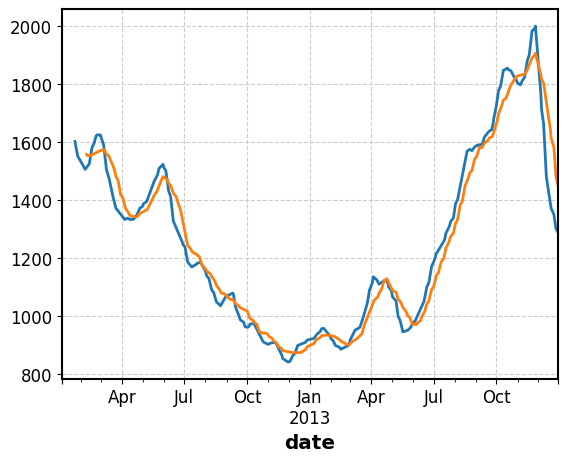

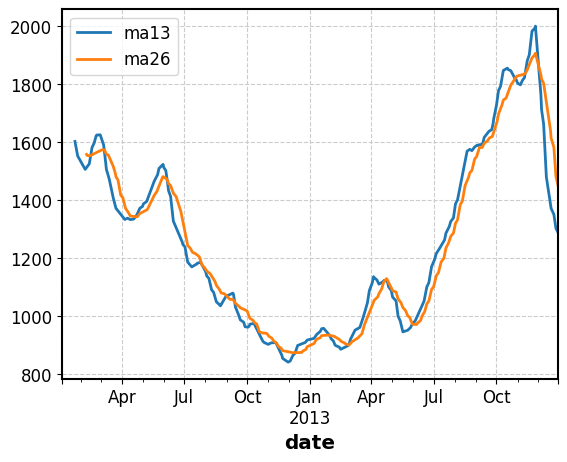

In [9]:
# (b) 短期の期間13日、中長期の期間を26日にして問題(2)(a)と同様の一覧を作成し、ゴールデンクロスとデッドクロスがおこる頻度を比較してみよう。

# (a)のスクリプトの短期と中長期の日数だけ変えて実行する。

# コード2.8
# 日次株価データを読み込み
stockDaily = pd.read_csv('./data/stockDaily.csv', parse_dates=['date'])
stockDaily['date'] = stockDaily['date'].dt.to_period('D')
stockDaily = stockDaily.set_index('date').sort_index()

# 銘柄A0001のデータを選択する。
df = stockDaily[stockDaily['ticker'] == 'A0001']

# 日付を行ラベルに設定: plotしたときに横軸目盛りになる
# 日付をラベルスライサで選択
df = df.loc['2012-01-01': '2013-12-31']
print(df)

# コード2.9
# 13日移動平均、26日移動平均
ma13 = df['close'].rolling(13).mean()
ma26 = df['close'].rolling(26).mean()

# Seriesのplot()メソッドを複数実行すれば重ねて描画されていく
ax = ma13.plot()
ax = ma26.plot(ax=ax)

# コード2.10
# close列からのみなるDataFrameを実体をコピーして作成
ma = df[['close']].copy()
# 移動平均の計算結果を同じDataFrameの列として追加する
ma['ma13'] = ma['close'].rolling(13).mean()
ma['ma26'] = ma['close'].rolling(26).mean()
# 短期(13日)移動平均が中長期(26日)移動平均を上回ったかどうか
ma['SgL'] = ma['ma13'] > ma['ma26']  # short term MA greater than long term MA
# ２つの移動平均の列を選択してチャートを描画
ma[['ma13', 'ma26']].plot()
# ゴールデンクロスとデッドクロスが起こる期間の内容を表示
print(ma.iloc[86:92])
print(ma.iloc[113:119])

# 短期が長期を上回ってる(SgL: Shorter greater than Longer)日に印をつけておく。
ma['SgL'] = ma['ma13'] > ma['ma26']
# shiftして一日前の印も作っておく。
ma['SgLyesterday'] = ma['SgL'].shift()
ma = ma.dropna(how='any')

# 当日に短期が長期を上回っていて、前日はそうでない日はgolden cross
ma['gold'] = (ma['SgL'] == True) & (ma['SgLyesterday'] == False)
# 逆に当日に長期が短期を上回っていて、前日はそうでない日はdead cross
ma['dead'] = (ma['SgL'] == False) & (ma['SgLyesterday'] == True)

# 表示
print('golden cross')
print(ma[ma['gold'] == True])
print('dead cross')
print(ma[ma['dead'] == True])

print('''
短期26日、中長期52日の場合、golden cross/dead crossともに4回であったが、
短期13日、中長期26日の場合は7回に増えている。
移動平均の期間を短くすることで、より細かな変動をとらえるようになり、その結果2本の線がクロスする回数も増えている。
''')

---
#### (3) 2001年1月から2010年12月までの月次データを使って、以下の問題を解いてみよう。
##### (a) G0013とZ0137の月次株価データから平均リターンと標準偏差を計算して、比較してみよう。何がいえるか考えてみよう。
##### (b) 全銘柄の月次リターンの平均値を計算し、高いものから順番に並べてみよう。
##### (c) 全銘柄の月次リターンの標準偏差を計算し、低いものから順番に並べてみよう

---

In [10]:
# CSV ファイルを読み込み DataFrame を構成し、対象期間を選択し、stockMonthly変数にセット
stockMonthly = pd.read_csv('./data/stockMonthly.csv', parse_dates=['month'])
stockMonthly['month'] = stockMonthly['month'].dt.to_period('M')
stockMonthly = stockMonthly.loc[(stockMonthly['month']>='2001-1') & (stockMonthly['month']<='2010-12')]
print(stockMonthly)


       ticker    month  open  high  low  close   volume     share     return  \
120     A0001  2001-01   831   837  829    829   483355  16502512 -10.281390   
121     A0001  2001-02   744   754  718    728   216462  16502512 -12.183350   
122     A0001  2001-03   642   649  625    625   162632  16502512 -14.148350   
123     A0001  2001-04   669   669  669    669   105383  16502512   7.040000   
124     A0001  2001-05   702   715  691    692   211795  16502512   3.437967   
...       ...      ...   ...   ...  ...    ...      ...       ...        ...   
585973  Z0137  2010-08   368   368  368    368  2405516  76048912   6.051873   
585974  Z0137  2010-09   396   396  389    389  2039152  76048912   5.706522   
585975  Z0137  2010-10   441   441  441    441  4045412  76048912  13.367610   
585976  Z0137  2010-11   434   434  434    434  3458042  76048912  -1.587302   
585977  Z0137  2010-12   419   419  410    411  2005309  76048912  -5.299539   

       industry  qme qbeme  
120       

In [11]:
# (a) G0013とZ0137の月次株価データから平均リターンと標準偏差を計算して、比較してみよう。何がいえるか考えてみよう。

df = stockMonthly.loc[stockMonthly['ticker'].isin(['G0013', 'Z0137']), ['ticker', 'return']]
print('平均リターン\n', df.groupby('ticker').mean())
print('標準偏差\n', df.groupby('ticker').std())

平均リターン
           return
ticker          
G0013  -0.347837
Z0137   0.440364
標準偏差
            return
ticker           
G0013   12.924770
Z0137    9.237334


In [12]:
# (b) 全銘柄の月次リターンの平均値を計算し、高いものから順番に並べてみよう。

df = stockMonthly[['ticker', 'return']]
df = df.groupby('ticker').mean().sort_values('return', ascending=False)
print(df)


           return
ticker           
X0077   41.337786
I0013   30.963177
Y0006   26.178831
N0050   25.393497
J0111   23.867584
...           ...
S0031  -10.816655
W0087  -12.108431
I0011  -13.265729
D0027  -13.549900
H0075  -14.645610

[2837 rows x 1 columns]


In [13]:
# (c) 全銘柄の月次リターンの標準偏差を計算し、低いものから順番に並べてみよう

df = stockMonthly[['ticker', 'return']]
df = df.groupby('ticker').std().sort_values('return')
print(df)


            return
ticker            
S0069     2.305967
X0080     2.462399
F0075     2.521120
C0074     2.667323
S0067     2.708230
...            ...
U0011    58.494027
Y0006    58.838481
N0050    62.099941
I0072    65.918423
X0077   103.228139

[2837 rows x 1 columns]


---
#### (4) B0015とO0087の月次株価データを用いてB0015への投資ウェイトを0%から100%まで10%刻みで変化させたときのB0015とO0087からなるポートフォリオのリスク・リターン関係をscatter()メソッドを利用して描いてみよう。

---

        ticker  close     return
month                           
1991-01  A0001   1533   4.285714
1991-01  I0098   1909  -3.194726
1991-01  O0061   1285  -1.001541
1991-01  I0097   1893 -15.264100
1991-01  O0065   4614   0.151943
...        ...    ...        ...
2014-12  A0019   4423   5.611270
2014-12  Q0009    499  17.966900
2014-12  L0114   1604   8.451656
2014-12  Y0059   2540   1.154918
2014-12  Z0137    647  16.576580

[586026 rows x 3 columns]
x    8.210299
y    5.934279
dtype: float64
x    34.317058
y    22.125683
dtype: float64
0.12483375080850352
    pws     prets      pvols
0   0.0  5.934279  22.125683
1   0.1  6.161881  20.624501
2   0.2  6.389483  19.767319
3   0.3  6.617085  19.638649
4   0.4  6.844687  20.252380
5   0.5  7.072289  21.545162
6   0.6  7.299891  23.404739
7   0.7  7.527493  25.708410
8   0.8  7.755095  28.348116
9   0.9  7.982697  31.238785
10  1.0  8.210299  34.317058


<AxesSubplot:xlabel='pvols', ylabel='prets'>

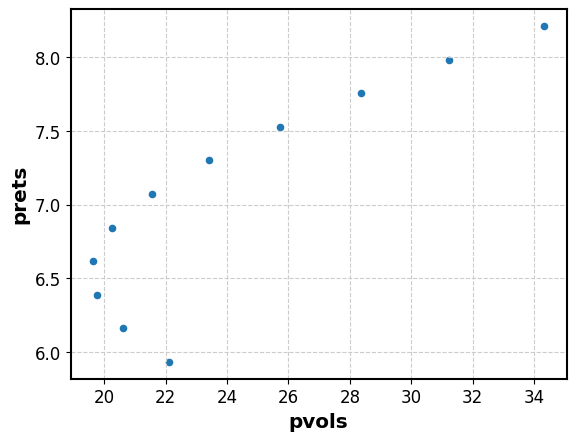

In [18]:
# 月次データの読み込みと選択
stockMonthly = pd.read_csv('./data/stockMonthly.csv', parse_dates=['month'])
stockMonthly['month'] = stockMonthly['month'].dt.to_period('M')
stockMonthly = stockMonthly.set_index('month').sort_index()
stockMonthly = stockMonthly.loc['1991-01':'2014-12', ['ticker', 'close', 'return']]
print(stockMonthly)

# ポートフォリオのリターンを計算する自作関数
def prtf_ret(mu_x, mu_y, w):
    return w * mu_x + (1 - w) * mu_y
    # mu_x: 銘柄xの期待リターン
    # mu_y: 銘柄yの期待リターン
    # w   : 銘柄xの投資ウェイト

# ポートフォリオのリスクを計算する自作関数
def prtf_vol(sigma_x, sigma_y, w, corr):
    return (w ** 2 * sigma_x ** 2 + (1 - w) ** 2 * sigma_y ** 2
                   + 2 * w * (1 - w) * sigma_x * sigma_y * corr)**(0.5)

stock_x = stockMonthly[stockMonthly['ticker'] == 'B0015']['return']
stock_y = stockMonthly[stockMonthly['ticker'] == 'O0087']['return']
rets = pd.DataFrame({'x': stock_x, 'y': stock_y})
mu = rets.mean() * 12  # 年率のリターン（%）を計算
sigma = rets.std() * 12**(0.5)  # 年率のリスク（%）を計算
corr = rets['x'].corr(rets['y'])  # 相関係数
print(mu)
# x    8.210299
# y    5.934279
# dtype: float64
print(sigma)
# x    34.317058
# y    22.125683
# dtype: float64
print(corr)
# 0.12483375080850352

# 投資ウェイト(pws)を0から1.0まで0.1刻みで生成
ds = pd.DataFrame({'pws': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]})
ds['prets'] = prtf_ret(mu['x'], mu['y'], ds['pws'])
ds['pvols'] = prtf_vol(sigma['x'], sigma['y'], ds['pws'], corr)

# 結果の表示
print(ds)
ds.plot.scatter(x='pvols', y='prets')

# 参考)
# 小数点のrangeはNumPyを使えば以下の通り書き換えることができる。
# import numpy as np
# np.arange(0.0, 1.1, 0.1)
